In [59]:
import sys

sys.path.append('../../src/')
from utils import load_data, extract_title

In [17]:
# =============================================================================
# 1. LOAD DATA
# =============================================================================

In [21]:
# Load datasets
train_df, test_df = load_data()

In [23]:
# =============================================================================
# 2. EXPLORATORY DATA ANALYSIS
# =============================================================================

In [31]:
print(train_df.groupby('Survived')['Age'].describe())

          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0


In [43]:
# Since we are considering to implement Age let's check the null values
print("=== AGE ANALYSIS ===")
print(f"Total missing values: {train_df['Age'].isnull().sum()}")
print(f"Percentage missing: {train_df['Age'].isnull().sum() / len(train_df) * 100:.1f}%")

=== AGE ANALYSIS ===
Total missing values: 177
Percentage missing: 19.9%


<Axes: xlabel='Survived', ylabel='Age'>

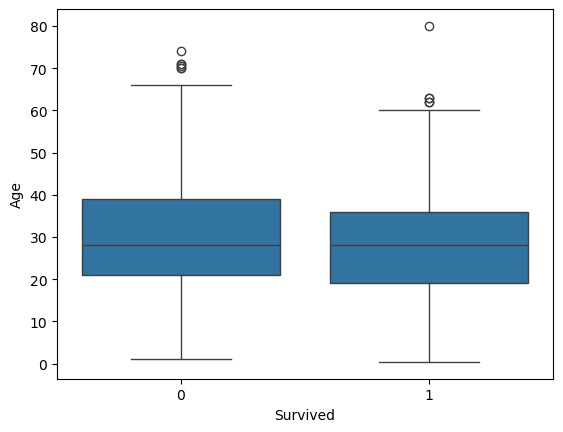

In [35]:
import seaborn as sns
sns.boxplot(x='Survived', y='Age', data=train_df)

In [47]:
print("\n=== AGE STATISTICS BY DEMOGRAPHIC GROUPS ===")
age_stats = train_df.groupby(['Sex', 'Pclass'])['Age'].agg(['mean', 'median', 'count']).round(2)
print("\nAge by Sex + Pclass:")
print(age_stats)


=== AGE STATISTICS BY DEMOGRAPHIC GROUPS ===

Age by Sex + Pclass:
                mean  median  count
Sex    Pclass                      
female 1       34.61    35.0     85
       2       28.72    28.0     74
       3       21.75    21.5    102
male   1       41.28    40.0    101
       2       30.74    30.0     99
       3       26.51    25.0    253


In [ ]:
# Análise de sobrevivência por faixa etária
print("\n=== SURVIVAL BY AGE GROUPS ===")
df_with_age = train_df.dropna(subset=['Age'])

# Criar faixas etárias
df_temp = df_with_age.copy()
df_temp['Age_Group'] = pd.cut(df_temp['Age'], 
                              bins=[0, 12, 18, 30, 50, 80], 
                              labels=['Child', 'Teen', 'Young_Adult', 'Adult', 'Senior'])

survival_by_age = df_temp.groupby('Age_Group')['Survived'].agg(['mean', 'count']).round(3)
print(survival_by_age)

df_temp.head()

In [145]:
train_df['Title'] = train_df['Name'].map(extract_title)
median_age_per_title = train_df.groupby('Title')['Age'].median()

train_df['Age'] = train_df.apply(lambda row: median_age_per_title[row['Title']] if pd.isnull(row['Age']) else row['Age'], axis=1)
train_df['Age'].isnull().sum()


0

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
